In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("TaxiTrips.csv", low_memory=False)

df = df[['Trip Start Timestamp', 'Trip Miles', 'Trip Seconds', 'Fare',
         'Tips', 'Tolls', 'Extras', 'Payment Type']]

In [ ]:
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'], errors='coerce')
df.dropna(subset=['Trip Start Timestamp'], inplace=True)

df['Hour'] = df['Trip Start Timestamp'].dt.hour
df['DayOfWeek'] = df['Trip Start Timestamp'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

df.drop(columns=['Trip Start Timestamp'], inplace=True)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_payment = encoder.fit_transform(df[['Payment Type']])
encoded_cols = encoder.get_feature_names_out(['Payment Type'])
df_encoded = pd.DataFrame(encoded_payment, columns=encoded_cols, index=df.index)

df.drop(columns=['Payment Type'], inplace=True)
df = pd.concat([df, df_encoded], axis=1)

In [ ]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop(columns=['Fare'])
y = df_imputed['Fare']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model trained successfully")
print("R² Score: ",r2)
print("RMSE: ",rmse)

Linear Regression Model trained successfully
R² Score:  0.6187267981424345
RMSE:  11.901473155364855


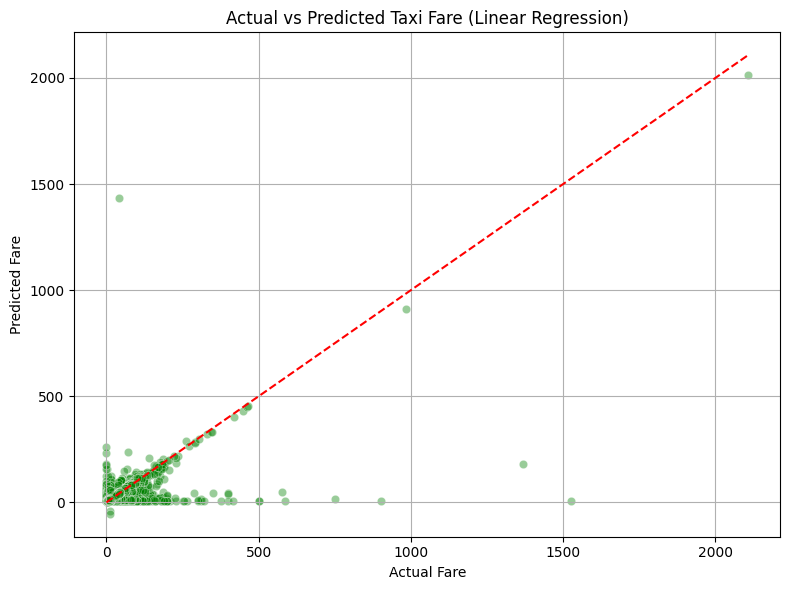

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Taxi Fare (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

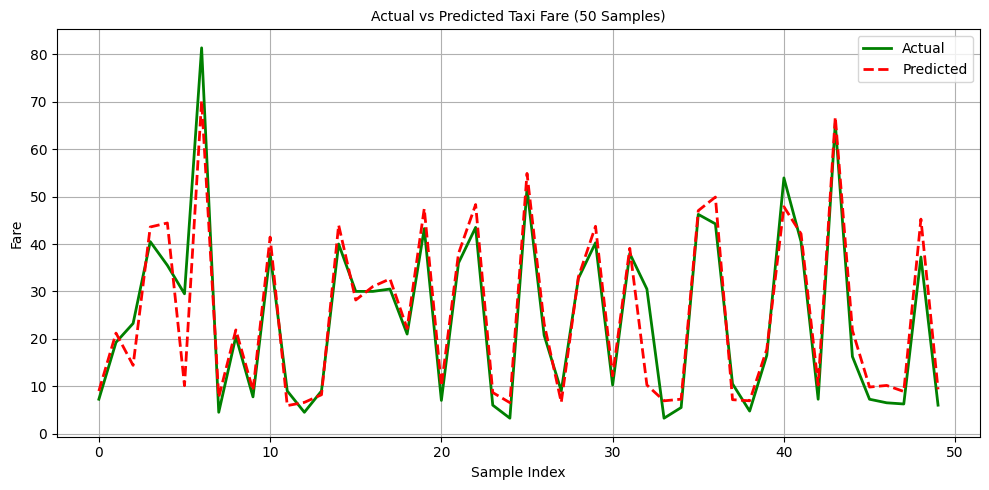

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label='Actual', color='green', linewidth=2)
plt.plot(y_pred[:50], label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Taxi Fare (50 Samples)", fontsize=10)
plt.xlabel("Sample Index")
plt.ylabel("Fare")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()